
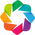

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import sqlite3
import quandl
import pandas.io.sql as psql
import json
from sqlalchemy import create_engine
import requests
import holoviews as hv
import matplotlib.pyplot as plt
import warnings
import os.path
warnings.filterwarnings("ignore")
from holoviews.operation.timeseries import rolling, rolling_outlier_std
from holoviews.streams import Stream
hv.notebook_extension('bokeh')

In [2]:
# collecting Data from Mercado Bitcoin

In [3]:
if os.path.isfile('mercadoBTC.csv'):
    print("Dataset already exists")
else:
    print("Downloading data...")
    for coin in ['BTC', 'LTC', 'BCH']:
        head = True
        for year in range(2018,2013,-1):
            print("\nano: "+str(year) +" "+str(coin))
            for month in range(1,13):
                print("\nmes: "+str(month))
                w =[]
                for day in range(1,32):
                    url = 'https://www.mercadobitcoin.net/api/'+coin+'/day-summary/'+str(year)+'/'+str(month)+'/'+str(day)+'/'

                    try:
                        x = requests.get(url).json()
                        y = pd.DataFrame.from_dict(x, orient='index')
                        w.append(y.T.set_index('date'))
                        print('.', end='')
                    except:
                        pass
                if len(w)>0:
                    df = pd.concat(w)
                    df.to_csv('mercado'+coin+'.csv' , mode='a+', header=head)
                    head = False

    print(df)

Dataset already exists


In [4]:
# importing and properly sort organizing the datasets in python environment.
bitcoincsv = pd.read_csv('mercadoBTC.csv')
bitcoincsv.set_index('date', inplace = True)
bitcoincsv = bitcoincsv[bitcoincsv.volume != 0]
bitcoincsv = bitcoincsv.sort_index(ascending = True)
litecoincsv = pd.read_csv('mercadoLTC.csv',)
litecoincsv.set_index('date', inplace = True)
litecoincsv = litecoincsv[litecoincsv.volume != 0]
litecoincsv = litecoincsv.sort_index(ascending = True)
bitcoincashcsv = pd.read_csv('mercadoBCH.csv')
bitcoincashcsv.set_index('date', inplace = True)
bitcoincashcsv = bitcoincashcsv[bitcoincashcsv.volume != 0]
bitcoincashcsv = bitcoincashcsv.sort_index(ascending = True)

In [5]:
# export dataframes to a SQL database
connection = sqlite3.connect('..\\crypto_algo_trading\\bitcoin.db')
pd.DataFrame.to_sql(self = bitcoincsv, name = 'bitcoin', con= connection, index = True, if_exists = 'replace')
connection.close()
connection = sqlite3.connect('..\\crypto_algo_trading\\litecoin.db')
pd.DataFrame.to_sql(self = litecoincsv, name = 'litecoin', con= connection, index = True, if_exists = 'replace')
connection.close()
connection = sqlite3.connect('..\\crypto_algo_trading\\bitcoincash.db')
pd.DataFrame.to_sql(self = bitcoincashcsv, name = 'bitcoincash', con= connection, index = True, if_exists = 'replace')
connection.close()

In [6]:
# importing data from SQL database into a python environment
connection = sqlite3.connect('..\\crypto_algo_trading\\bitcoin.db')
bitcoin = psql.read_sql('select * from bitcoin;', con=connection)
bitcoin.set_index('date', inplace = True)
bitcoin.head()
connection = sqlite3.connect('..\\crypto_algo_trading\\litecoin.db')
litecoin = psql.read_sql('select * from litecoin;', con=connection)
litecoin.set_index('date', inplace = True)
litecoin.head()
connection = sqlite3.connect('..\\crypto_algo_trading\\bitcoincash.db')
bitcoincash = psql.read_sql('select * from bitcoincash;', con=connection)
bitcoincash.set_index('date', inplace = True)
bitcoincash.head()

,lowest,volume,amount,avg_price,opening,closing,highest,quantity
date,,,,,,,,
2017-08-21,1903.00,3.905954e+06,5030,2450.360912,2384.0,2125.00,10000.00,1594.032164
2017-08-22,1999.77,2.137589e+06,2563,2294.297598,2125.0,2372.00,2430.00,931.696479
2017-08-23,2050.00,1.308950e+06,1544,2334.104802,2405.0,2230.00,2430.00,560.793010
2017-08-24,2080.67,1.687734e+06,1610,2162.214828,2199.0,2164.99,2274.99,780.558084
2017-08-25,2080.00,1.233663e+06,1289,2159.749669,2157.0,2130.02,2268.75,571.206328


In [7]:
# checking tail of bitcoin
bitcoin.tail()

,lowest,volume,amount,avg_price,opening,closing,highest,quantity
date,,,,,,,,
2018-01-24,35018.00000,6.197219e+06,3882,36804.246146,35550.00000,36800.00090,37790.0,168.383259
2018-01-25,36400.00000,4.941990e+06,2946,36852.746963,37104.99999,36996.96000,37570.0,134.100992
2018-01-26,35280.00000,7.125085e+06,3944,35865.814428,36820.00006,35800.00000,37200.0,198.659498
2018-01-27,35599.99999,2.559921e+06,1929,36306.411586,35801.00000,36300.00000,37050.0,70.508780
2018-01-28,36300.00000,4.423525e+06,2569,37246.689450,36300.00003,36500.00004,38090.0,118.762900


In [8]:
# checking head of litecoin
litecoin.head()

,lowest,volume,amount,avg_price,opening,closing,highest,quantity
date,,,,,,,,
2014-01-01,59.4998,32412.082463,111,60.503942,59.4998,60.81000,62.000,535.702000
2014-01-02,60.0200,57506.456580,155,61.438738,60.8100,62.03010,63.140,935.996707
2014-01-03,58.0000,81895.192327,225,61.516761,62.6000,62.00000,62.790,1331.266319
2014-01-04,61.0000,15902.407280,71,62.016755,62.0000,62.69000,62.789,256.421144
2014-01-05,62.0000,39902.293160,145,63.735509,62.6900,64.00001,65.000,626.060632


In [9]:
# creating returns and adjusting the dataset of returns
returns = pd.DataFrame(bitcoin.closing)
returns.rename(columns={'closing': 'BTCclosing'}, inplace=True)
returns['LTCclosing'] = pd.DataFrame(litecoin.closing)
returns['BCHclosing']= pd.DataFrame(bitcoincash.closing)
returns = returns.sort_index(ascending = True)
returns['BTCret'] = returns.BTCclosing/returns.BTCclosing.shift(1) - 1
returns['LTCret'] = returns.LTCclosing/returns.LTCclosing.shift(1) - 1
returns['BCHret'] = returns.BCHclosing/returns.BCHclosing.shift(1) - 1
returns['date'] = returns.index

In [10]:
# showing the prices for the selected criptocoin
def load_symbol(symbol, **kwargs):
    df = data[symbol]
    #df.reset_index(level=0, inplace=True)
    df['date'] = df.index
    return hv.Curve(df, ('date', 'Date'), ('closing', 'Close price (R$)'))

stock_symbols = ['Bitcoin', 'Litecoin', 'Bitcoin Cash']
data = {'Bitcoin': bitcoin, 'Litecoin': litecoin, 'Bitcoin Cash': bitcoincash}
dmap = hv.DynamicMap(load_symbol, kdims='Symbol').redim.values(Symbol=stock_symbols)

In [12]:
%%opts Curve [width=700, height=350 tools=['hover']] {+framewise}
dmap

:DynamicMap   [Symbol]
   :Curve   [date]   (closing)

In [13]:
# bitcoin returns and histogram

In [14]:
%%opts Curve [width=700, height=500, show_grid=True tools=['hover']] {+framewise}
hv.Curve(returns, ('date', 'Date'),('BTCret', 'Return rate'), label='Bitcoin Returns').hist(num_bins=150)

:AdjointLayout
   :Curve   [date]   (BTCret)
   :Histogram   [BTCret]   (BTCret_frequency)

In [15]:
# rolling window for correlation of bitcoin and litecoin

In [16]:
%%opts Curve [width=700, height=350, show_grid=True tools=['hover']] {+framewise}
def rolling_corr(w):
    S = returns['BTCclosing'].rolling(w).corr(other=returns['LTCclosing'])
    returns['corrBTC'] = S
    return hv.Curve(returns.iloc[-1000:], ('date', 'Date'), ('corrBTC','Correlation Bitcoin and Litecoin'))
    
winsize = {s:rolling_corr(s) for s in range(10,62,2)}
rcorr = hv.HoloMap(winsize, kdims='Window size')
rcorr

:HoloMap   [Window size]
   :Curve   [date]   (corrBTC)

In [17]:
# creating a portfolio dataset with returns only and equal time period
portfolio = pd.DataFrame(returns.BTCret)
portfolio['LTCret'] = pd.DataFrame(returns.LTCret)
portfolio['BCHret'] = pd.DataFrame(returns.BCHret)
portfolio = portfolio.sort_index(ascending = True)
portfolio = portfolio.dropna()
portfolio.head()

,BTCret,LTCret,BCHret
date,,,
2017-08-22,0.062994,0.010938,0.116235
2017-08-23,0.010676,0.075734,-0.059865
2017-08-24,0.029474,-0.005862,-0.029152
2017-08-25,0.005112,0.010691,-0.016152
2017-08-26,0.005765,0.010986,0.004685


In [18]:
# calculate daily and annual returns
returns_annual = portfolio.mean() * 365
returns_annual

BTCret    2.924406
LTCret    4.469449
BCHret    4.228418
dtype: float64

In [19]:
# get daily and covariance of returns
cov_daily = portfolio.cov()
cov_annual = cov_daily * 365
cov_annual

,BTCret,LTCret,BCHret
BTCret,0.848627,0.477905,0.026259
LTCret,0.477905,2.391311,0.657941
BCHret,0.026259,0.657941,4.523205


In [20]:
# empty lists to store returns, volatility and weights of imaginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

In [21]:
# set the number of combinations for imaginary portfolios
selected = ['BTCret', 'LTCret', 'BCHret']
num_assets = len(selected)
num_portfolios = 10000

In [22]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns_list = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns_list / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns_list)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [23]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

In [24]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

In [25]:
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

In [26]:
# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]
df = df[column_order]

In [27]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

In [28]:
# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

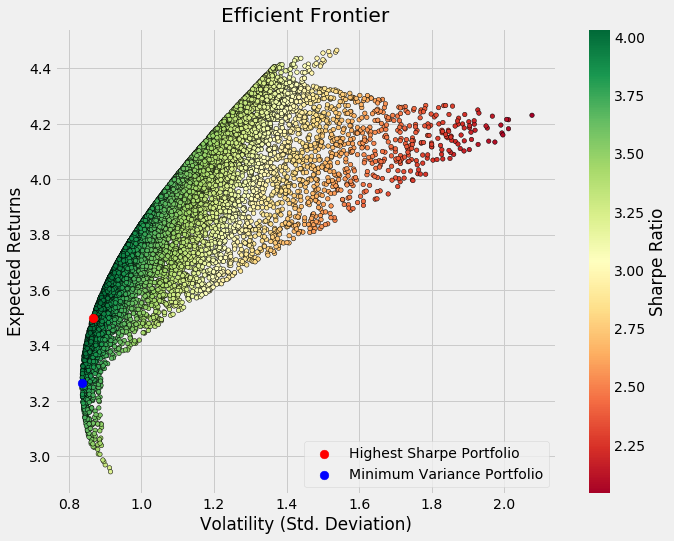

In [29]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='.',
            s=300, label = 'Highest Sharpe Portfolio')
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='.', 
            s=300, label = 'Minimum Variance Portfolio')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.legend(loc = 4)
plt.show()

In [30]:
# print the details of the 2 particular portfolios
print('Minimum Variance Portfolio')
print(min_variance_port.T)
print('')
print('Highest Sharpe Index Portfolio')
print(sharpe_portfolio.T)

Minimum Variance Portfolio
                   1347
Returns        3.265425
Volatility     0.836247
Sharpe Ratio   3.904855
BTCret Weight  0.757882
LTCret Weight  0.104946
BCHret Weight  0.137172

Highest Sharpe Index Portfolio
                   5604
Returns        3.499506
Volatility     0.866219
Sharpe Ratio   4.039978
BTCret Weight  0.602596
LTCret Weight  0.235985
BCHret Weight  0.161419


In [31]:
# TO DO
## See how to get data from a sql database
## Try to put my personal portfolio on it
## Create another graph

In [32]:
returns['date'] = returns.index
returns['date'] = pd.to_datetime(returns['date'])
returns.set_index('date', inplace = True)
returns['BTCvol']= pd.rolling_std(returns['BTCret'], 60) 
returns.tail()

,BTCclosing,LTCclosing,BCHclosing,BTCret,LTCret,BCHret,corrBTC,BTCvol
date,,,,,,,,
2018-01-24,36800.00090,578.99999,5400.00000,0.033708,0.024779,0.027397,0.739852,0.062143
2018-01-25,36996.96000,570.11000,5366.99998,0.005352,-0.015354,-0.006111,0.727905,0.061230
2018-01-26,35800.00000,562.98000,5100.00001,-0.032353,-0.012506,-0.049748,0.715831,0.061396
2018-01-27,36300.00000,571.00000,5234.00001,0.013966,0.014246,0.026275,0.707951,0.060227
2018-01-28,36500.00004,588.50001,5333.00000,0.005510,0.030648,0.018915,0.704829,0.059190


In [33]:
from arch import arch_model
import datetime as dt
import matplotlib.pyplot as plt

start = dt.datetime(2014,1,1)
end = dt.datetime(2018,1,25)
am = arch_model(returns['BTCvol'], vol='Garch', p=1, o=0, q=1, dist='Normal')

In [34]:
split_date = np.datetime64('2017-01-01')
res = am.fit(first_obs = '2016-01-01', last_obs=split_date, tol = 100)
print(res)

Iteration:      1,   Func. Count:      6,   Neg. LLF: -1223.7302413314826
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1310.1139884711224
            Iterations: 1
            Function evaluations: 17
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 BTCvol   R-squared:                      -0.217
Mean Model:             Constant Mean   Adj. R-squared:                 -0.217
Vol Model:                      GARCH   Log-Likelihood:                1310.11
Distribution:                  Normal   AIC:                          -2612.23
Method:            Maximum Likelihood   BIC:                          -2596.62
                                        No. Observations:                  366
Date:                Tue, Jan 30 2018   Df Residuals:                      362
Time:                        13:54:21   Df Model:                            4
     

In [35]:
forecasts = res.forecast(start=split_date)
returns['BTCevol'] = forecasts.variance[split_date:]
returns['BTCevol'][split_date:].plot(legend=True)
returns['BTCvol'][split_date:].plot(legend=True)
returns.tail()


,BTCclosing,LTCclosing,BCHclosing,BTCret,LTCret,BCHret,corrBTC,BTCvol,BTCevol
date,,,,,,,,,
2018-01-24,36800.00090,578.99999,5400.00000,0.033708,0.024779,0.027397,0.739852,0.062143,0.001663
2018-01-25,36996.96000,570.11000,5366.99998,0.005352,-0.015354,-0.006111,0.727905,0.061230,0.001651
2018-01-26,35800.00000,562.98000,5100.00001,-0.032353,-0.012506,-0.049748,0.715831,0.061396,0.001645
2018-01-27,36300.00000,571.00000,5234.00001,0.013966,0.014246,0.026275,0.707951,0.060227,0.001621
2018-01-28,36500.00004,588.50001,5333.00000,0.005510,0.030648,0.018915,0.704829,0.059190,0.001585


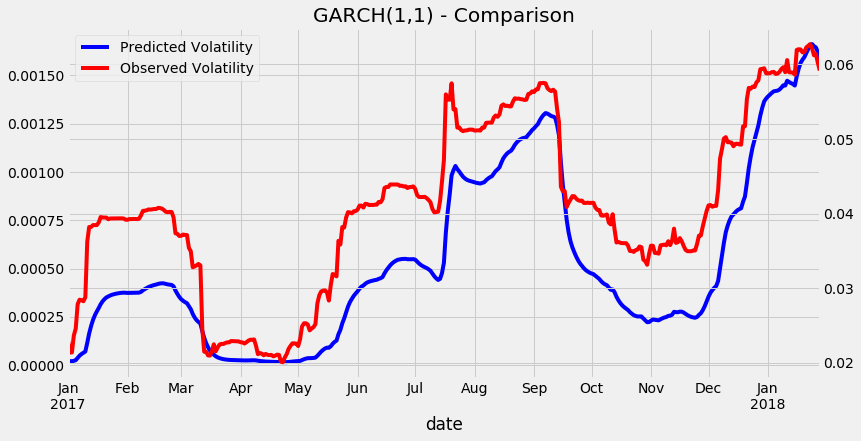

In [37]:
plt.figure(figsize=(12,6))
plt.xlabel('')
plt.title('GARCH(1,1) - Comparison')

ax1 = returns['BTCevol'][split_date:].plot(color='blue', grid=True, label='Predicted Volatility')
ax2 = returns['BTCvol'][split_date:].plot(color='red', grid=True, secondary_y=True, label='Observed Volatility')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()